Projet : Prédiction de la présence d’un réservoir pétrolier

Ce projet vise à prédire la présence d’un réservoir d’hydrocarbures à partir de données géologiques et géophysiques provenant du Synthetic Oil Reservoir Prediction Dataset.
L’objectif est de construire un pipeline complet de machine learning : exploration des données, préparation, modélisation, optimisation, interprétation géologique et déploiement du meilleur modèle.

## Description du dataset

Le dataset contient 5 000 points d’exploration, chacun correspondant à une localisation géologique, avec des caractéristiques simulées à partir de principes réels d’exploration pétrolière.
Il est conçu pour tester la capacité des modèles ML à prédire la présence d’huile avant forage, tâche critique en exploration-production.

### Variables explicatives

- Rock_Type : type de roche (Sandstone, Limestone, Shale)
- Porosity (%) : volume de vide dans la roche (0–30%)
- Permeability (mD) : capacité de la roche à laisser circuler les fluides (1–1000 mD)
- Trap_Type : type de piégeage géologique (Anticline, Fault, Dome, None)
- Seismic_Score : score géophysique (0–1) dérivé de données sismiques
- Proximity_to_Oil_Field (km) : distance au champ pétrolier connu le plus proche
- Estimated_Reservoir_Depth (m) : profondeur estimée du réservoir (500–5000 m)

### Variable cible

Oil_Presence :

  1 → présence d’huile

  0 → absence d’huile

Ce dataset est idéal pour :
- entraînement et comparaison de modèles de classification
- analyse géologique des facteurs favorisant la présence d’huile
- interprétabilité via importance de features et SHAP
- construction d’un pipeline reproductible et déployable

### 1 - Chargement des données et inspection rapide

Objectif :
Initialiser l’environnement Python, charger le fichier synthetic_oil_data.csv, vérifier la structure générale du dataset (dimensions, types des colonnes, aperçu des premières lignes)

In [62]:
# Import des librairies de base et chargement des données

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

try:
    import jinja2
except ImportError:
    %pip install jinja2
    import jinja2

# Pour avoir des affichages plus jolis
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# Chargement du dataset
data_path = "synthetic_oil_data.csv"
df = pd.read_csv(data_path)

print("✅ Données chargées.")
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}\n")

print("Aperçu des premières lignes :")
display(df.head())

print("\nTypes de variables :")
print(df.dtypes)

print("\nRésumé statistique des variables numériques :")
display(df.describe())

✅ Données chargées.
Nombre de lignes : 5000
Nombre de colonnes : 8

Aperçu des premières lignes :


,Rock_Type,Porosity,Permeability,Trap_Type,Seismic_Score,Proximity_to_Oil_Field,Estimated_Reservoir_Depth,Oil_Presence
0,Shale,0.438848,903.714252,NaN,0.181881,4.226811,1547,0
1,Sandstone,6.217269,111.883819,Fault,0.169586,0.583624,4878,0
2,Shale,21.397076,177.944336,NaN,0.862800,0.180588,1815,0
3,Shale,11.598605,429.236160,Dome,0.498148,3.042691,1886,0
4,Sandstone,19.874518,127.586022,Anticline,0.245937,1.708715,4420,0



Types de variables :
Rock_Type                     object
Porosity                     float64
Permeability                 float64
Trap_Type                     object
Seismic_Score                float64
Proximity_to_Oil_Field       float64
Estimated_Reservoir_Depth      int64
Oil_Presence                   int64
dtype: object

Résumé statistique des variables numériques :


,Porosity,Permeability,Seismic_Score,Proximity_to_Oil_Field,Estimated_Reservoir_Depth,Oil_Presence
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,14.958907,499.793178,0.493651,2.513150,2754.559400,0.27760
std,8.674819,286.770534,0.287844,1.454329,1292.663792,0.44786
min,0.005596,1.118526,0.000009,0.001007,500.000000,0.00000
25%,7.561790,257.545687,0.244768,1.257381,1654.000000,0.00000
50%,15.054909,500.604268,0.491643,2.491227,2744.500000,0.00000
75%,22.440227,744.705800,0.740988,3.789352,3867.250000,1.00000
max,29.995477,999.707930,0.999695,4.999111,4997.000000,1.00000


## 2 - Vérification des valeurs manquantes et nettoyage initial

Objectif :
- Identifier s'il existe des valeurs manquantes
- Visualiser leur répartition
- Corriger si nécessaire (ici, il y a déjà au moins des NaN dans Trap_Type)
- Préparer les données pour l’EDA avancée

On reste simple pour l’instant :
- Affichage du tableau des NaN
- Heatmap de valeurs manquantes
- Remplissage des NaN de Trap_Type par "Unknown" pour ne pas biaiser les modèles

🔎 Vérification des valeurs manquantes :


Rock_Type                       0
Porosity                        0
Permeability                    0
Trap_Type                    1253
Seismic_Score                   0
Proximity_to_Oil_Field          0
Estimated_Reservoir_Depth       0
Oil_Presence                    0
dtype: int64

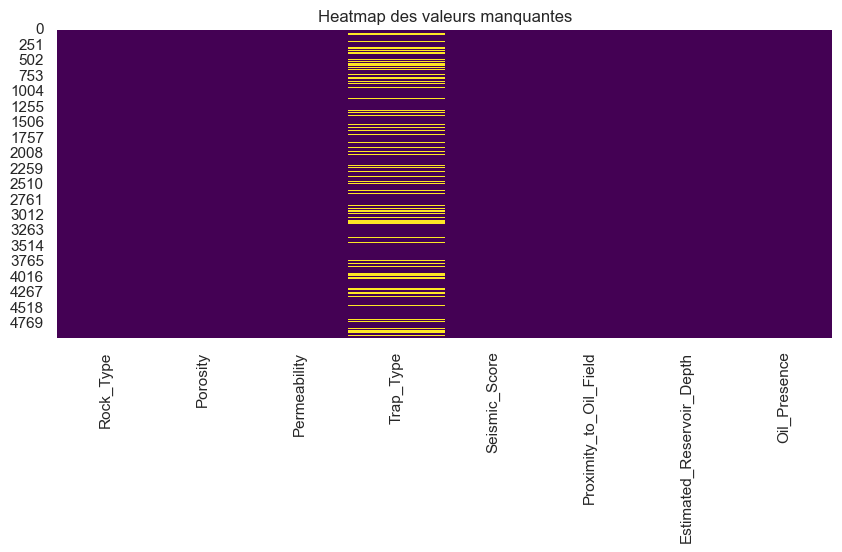


✔️ Remplacement des NaN effectué pour 'Trap_Type'.

🔄 Vérification après nettoyage :


Rock_Type                    0
Porosity                     0
Permeability                 0
Trap_Type                    0
Seismic_Score                0
Proximity_to_Oil_Field       0
Estimated_Reservoir_Depth    0
Oil_Presence                 0
dtype: int64

In [63]:
# Vérification des valeurs manquantes et nettoyage initial

print("🔎 Vérification des valeurs manquantes :")
display(df.isnull().sum())

# Visualisation heatmap des NaN
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap des valeurs manquantes")
plt.show()

# Traitement : remplissage des NaN pour Trap_Type
df['Trap_Type'] = df['Trap_Type'].fillna("Unknown")

print("\n✔️ Remplacement des NaN effectué pour 'Trap_Type'.")

# Double vérification
print("\n🔄 Vérification après nettoyage :")
display(df.isnull().sum())

## 3 - Analyse exploratoire (EDA) : distributions des variables numériques

Objectif :
- Visualiser les distributions de toutes les variables numériques
- Repérer d’éventuels outliers
- Comprendre les tendances générales
- Préparer l’analyse croisée avec la variable cible

Les graphiques inclus :
- Histogrammes + KDE
- Boxplots
- Pairplot des features clés

📊 Variables numériques : ['Porosity', 'Permeability', 'Seismic_Score', 'Proximity_to_Oil_Field', 'Estimated_Reservoir_Depth']


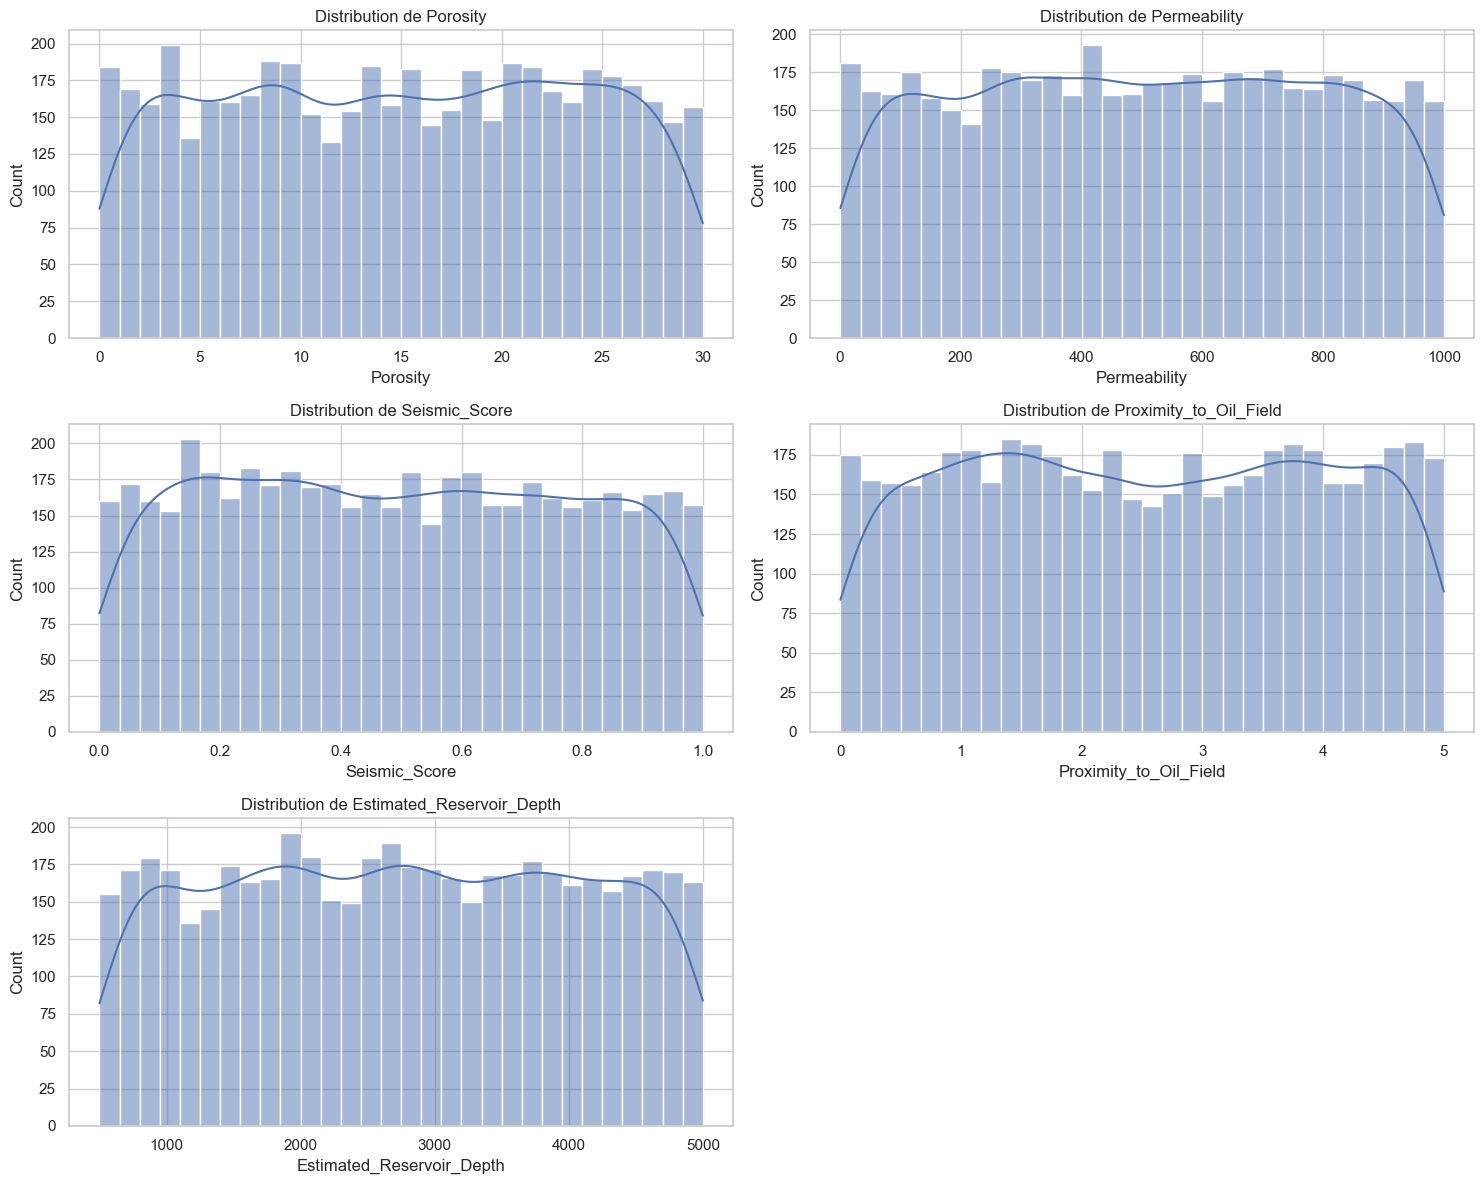

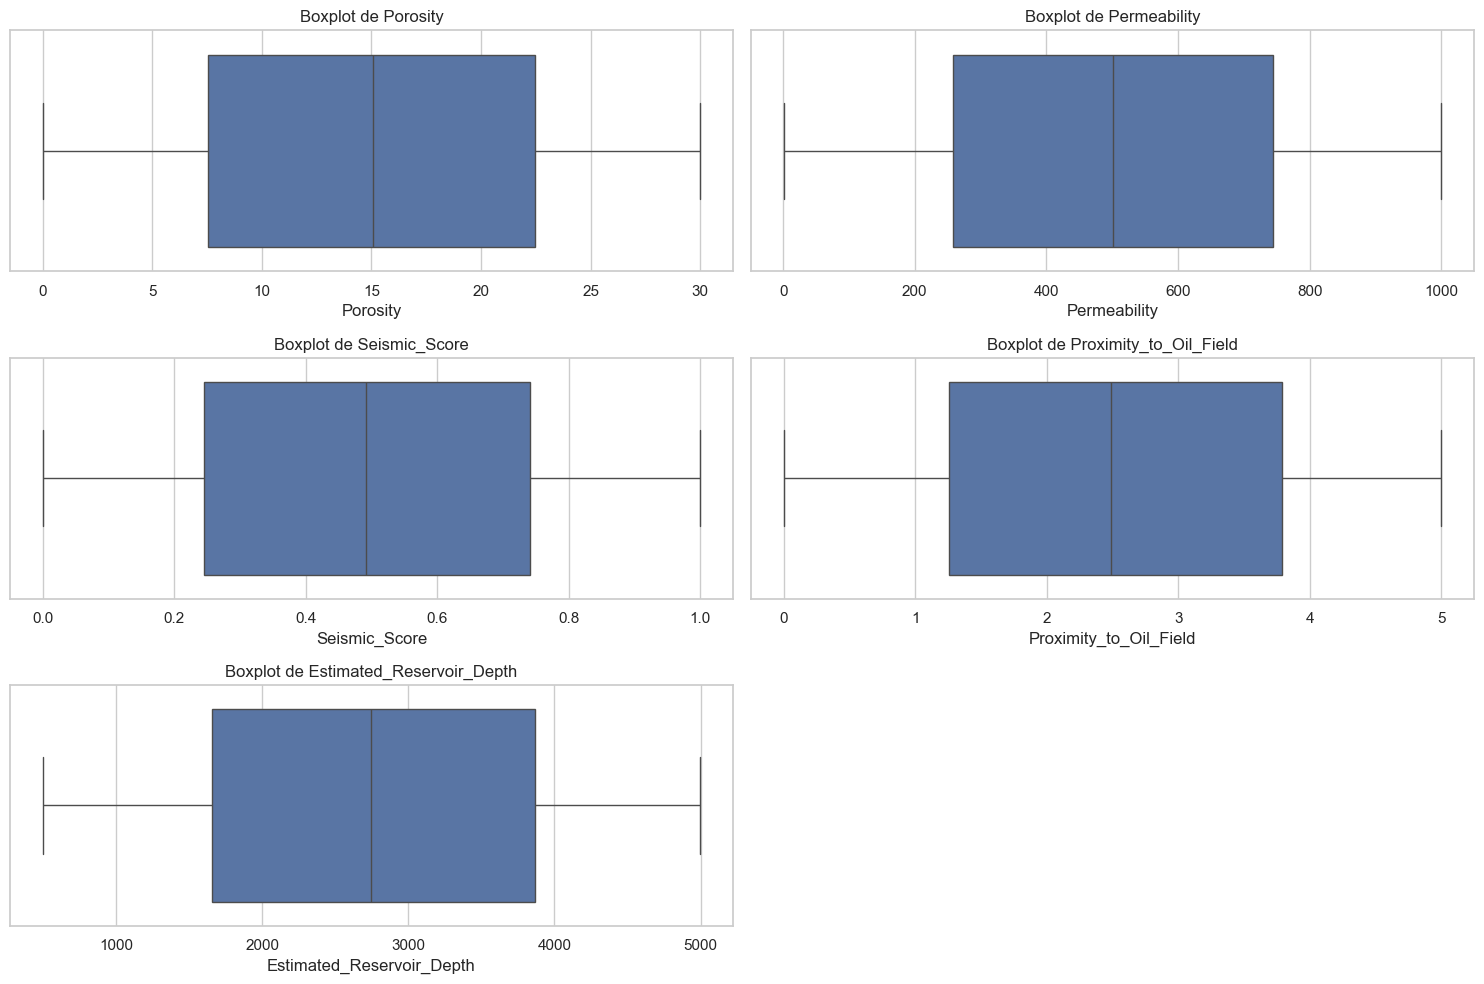

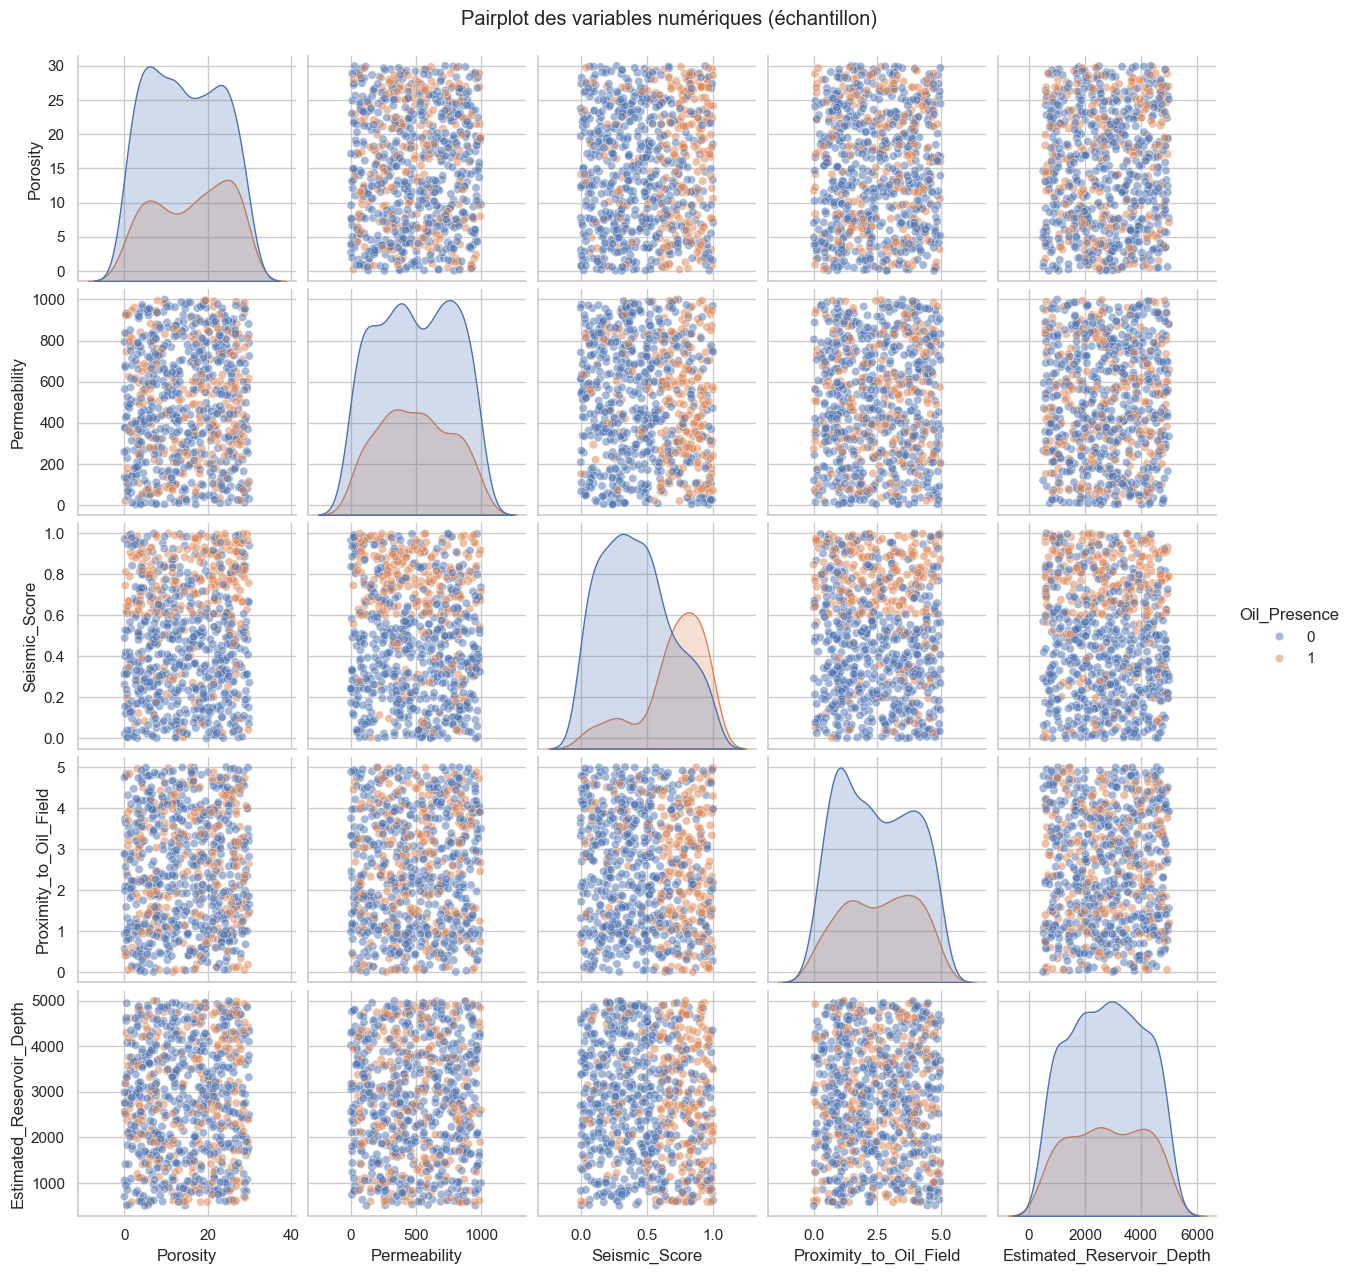

In [64]:
# Analyse exploratoire : distributions des variables numériques

numeric_cols = ['Porosity', 'Permeability', 'Seismic_Score',
                'Proximity_to_Oil_Field', 'Estimated_Reservoir_Depth']

print("📊 Variables numériques :", numeric_cols)

# Histogrammes + KDE
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution de {col}")
plt.tight_layout()
plt.show()

# Boxplots pour détecter outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

# Pairplot (échantillonné pour éviter lenteurs)
sample_df = df.sample(800, random_state=42)

sns.pairplot(sample_df[numeric_cols + ['Oil_Presence']],
             hue='Oil_Presence',
             diag_kind='kde',
             plot_kws={"alpha": 0.5})
plt.suptitle("Pairplot des variables numériques (échantillon)", y=1.02)
plt.show()

## 4 - Analyse exploratoire : variables catégorielles (graphes et proportions)

Objectif :
- Explorer Rock_Type, Trap_Type et leur relation avec Oil_Presence
- Visualiser les distributions via des countplots
- Calculer les proportions d’huile trouvée par catégorie
- Mettre en évidence les catégories géologiquement favorables

Graphiques inclus :
- Countplot simple
- Countplot par classe (hue=Oil_Presence)
- Barplot des proportions d’huile par catégorie

📁 Variables catégorielles : ['Rock_Type', 'Trap_Type']


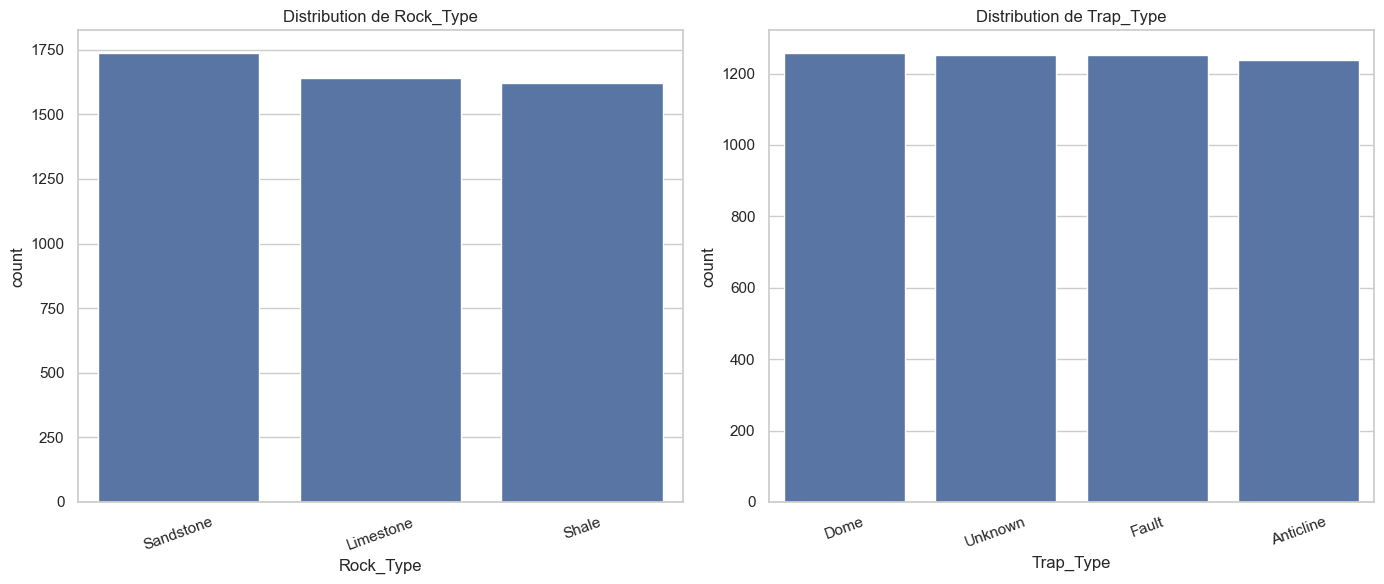

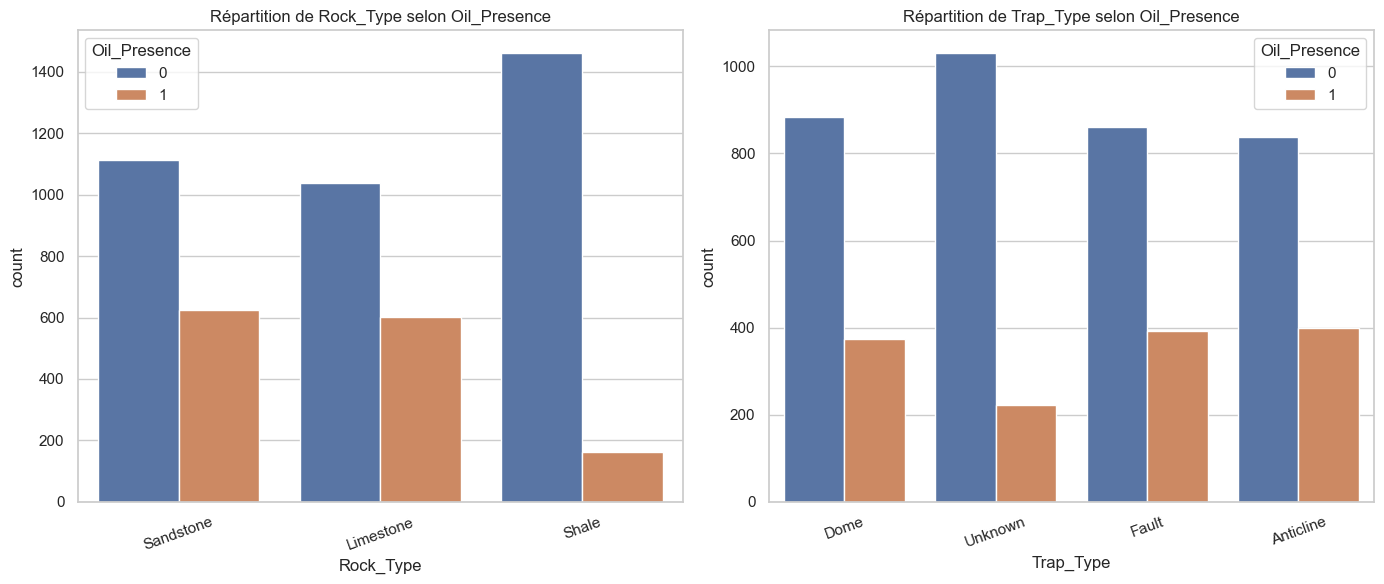


📌 Proportion d'huile trouvée par catégorie pour Rock_Type :


Rock_Type
Limestone    0.366463
Sandstone    0.360184
Shale        0.099260
Name: Oil_Presence, dtype: float64

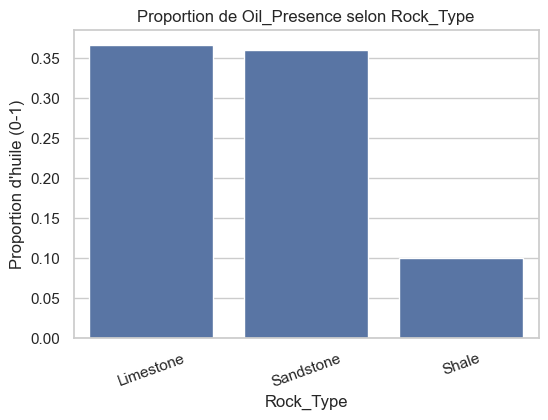


📌 Proportion d'huile trouvée par catégorie pour Trap_Type :


Trap_Type
Anticline    0.322555
Fault        0.313099
Dome         0.298092
Unknown      0.177175
Name: Oil_Presence, dtype: float64

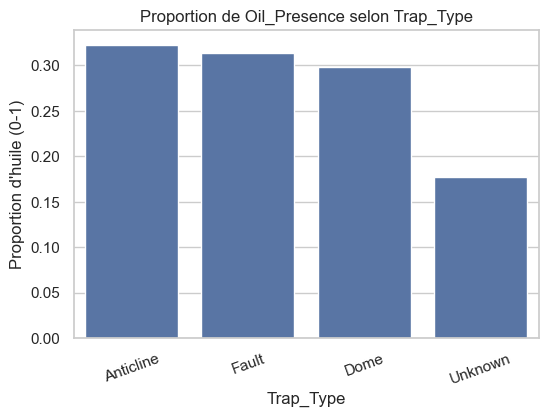

In [65]:
# Analyse des variables catégorielles

categorical_cols = ['Rock_Type', 'Trap_Type']
print("📁 Variables catégorielles :", categorical_cols)

# Countplots simples
plt.figure(figsize=(14, 6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribution de {col}")
    plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# Countplots croisés avec la cible
plt.figure(figsize=(14, 6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=df[col], hue=df['Oil_Presence'],
                  order=df[col].value_counts().index)
    plt.title(f"Répartition de {col} selon Oil_Presence")
    plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# Pourcentage d'huile trouvée par catégorie
for col in categorical_cols:
    prop = df.groupby(col)['Oil_Presence'].mean().sort_values(ascending=False)
    print(f"\n📌 Proportion d'huile trouvée par catégorie pour {col} :")
    display(prop)

    # Barplot
    plt.figure(figsize=(6,4))
    sns.barplot(x=prop.index, y=prop.values)
    plt.title(f"Proportion de Oil_Presence selon {col}")
    plt.ylabel("Proportion d'huile (0-1)")
    plt.xticks(rotation=20)
    plt.show()

## 5 - Analyse multivariée : corrélations, heatmap et interactions

Objectif :
- Examiner les corrélations entre variables numériques
- Visualiser la matrice de corrélation avec une heatmap
- Étudier les interactions importantes avec la cible
- Repérer les relations non linéaires potentielles à exploiter par les modèles

Cette étape prépare le terrain pour la modélisation

📌 Matrice de corrélation (numériques) :


,Porosity,Permeability,Seismic_Score,Proximity_to_Oil_Field,Estimated_Reservoir_Depth,Oil_Presence
Porosity,1.000000,-0.009049,0.026360,-0.003156,0.022238,0.058804
Permeability,-0.009049,1.000000,-0.038379,-0.001014,-0.005138,-0.002380
Seismic_Score,0.026360,-0.038379,1.000000,0.003142,0.009861,0.438554
Proximity_to_Oil_Field,-0.003156,-0.001014,0.003142,1.000000,0.007773,0.003533
Estimated_Reservoir_Depth,0.022238,-0.005138,0.009861,0.007773,1.000000,0.007324
Oil_Presence,0.058804,-0.002380,0.438554,0.003533,0.007324,1.000000


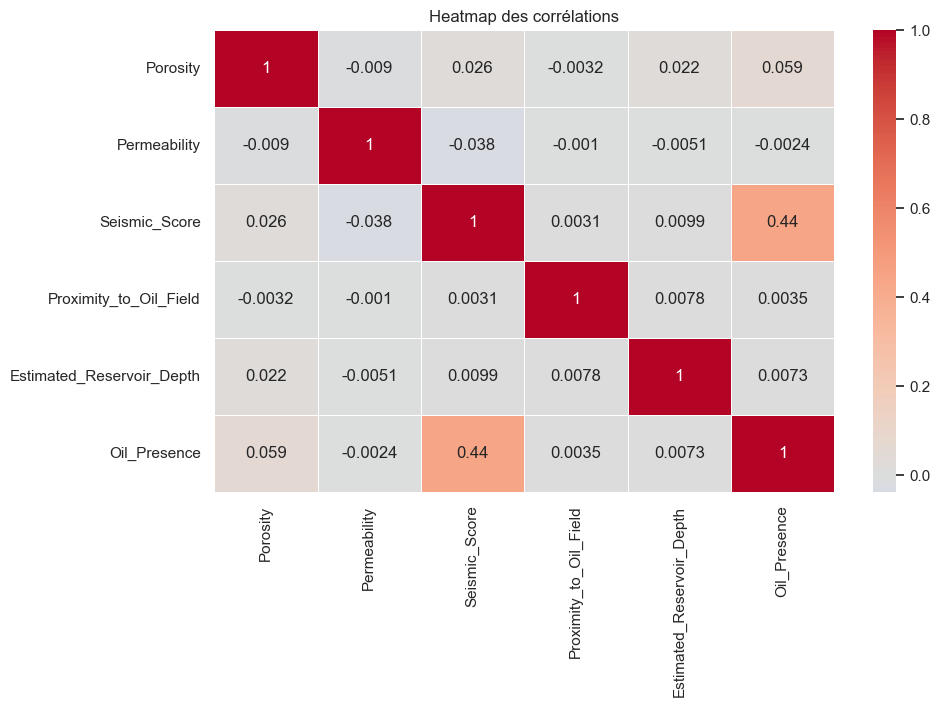


📌 Corrélation de chaque variable avec Oil_Presence :


Oil_Presence                 1.000000
Seismic_Score                0.438554
Porosity                     0.058804
Estimated_Reservoir_Depth    0.007324
Proximity_to_Oil_Field       0.003533
Permeability                -0.002380
Name: Oil_Presence, dtype: float64


📌 Variables explorées en scatterplot : ['Seismic_Score', 'Porosity', 'Estimated_Reservoir_Depth']


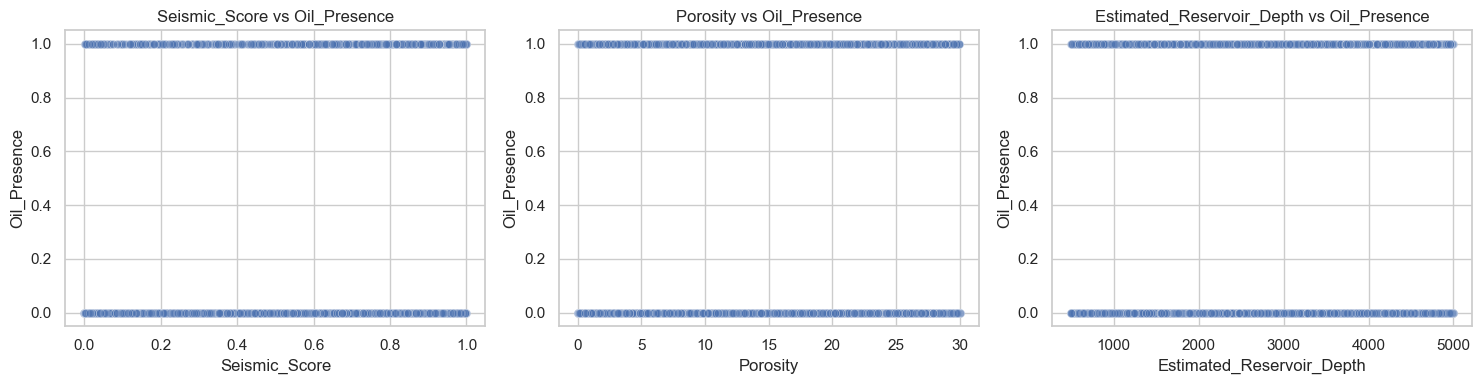

In [66]:
# Analyse multivariée : corrélations et interactions

# Sélection uniquement des variables numériques + cible
corr_cols = ['Porosity', 'Permeability', 'Seismic_Score',
             'Proximity_to_Oil_Field', 'Estimated_Reservoir_Depth',
             'Oil_Presence']

corr_matrix = df[corr_cols].corr()

print("📌 Matrice de corrélation (numériques) :")
display(corr_matrix)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Heatmap des corrélations")
plt.show()

# Corrélations triées avec la cible
target_corr = corr_matrix["Oil_Presence"].sort_values(ascending=False)
print("\n📌 Corrélation de chaque variable avec Oil_Presence :")
display(target_corr)

# Scatterplots des variables les plus corrélées avec la cible
top_features = target_corr.index[1:4]  # on ignore Oil_Prescence en 1er
print("\n📌 Variables explorées en scatterplot :", list(top_features))

plt.figure(figsize=(15, 4))
for i, col in enumerate(top_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df[col], y=df["Oil_Presence"], alpha=0.3)
    plt.title(f"{col} vs Oil_Presence")
plt.tight_layout()
plt.show()

## 6 - Préparation des données pour la modélisation (encodage, scaling, split 80/20)

Objectif :
- Préparer les données pour les modèles ML
- Encoder les variables catégorielles
- Standardiser les variables numériques
- Séparer en 80% train / 20% test
- Vérifier les dimensions des jeux générés

Contenu :
- Encodage One-Hot (Rock_Type, Trap_Type)
- Scaling StandardScaler pour les variables numériques
- Split train/test
- Reconstruction d’un DataFrame propre pour visualisation

In [67]:
# Préparation des données pour la modélisation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

print("🔧 Préparation des données pour la modélisation...\n")

# ===============================
# 1. Séparation X / y
# ===============================

X = df.drop("Oil_Presence", axis=1)
y = df["Oil_Presence"]

print("➡️ Variables explicatives :", X.columns.tolist())
print("➡️ Variable cible :", "Oil_Presence\n")

# ===============================
# 2. Encodage des variables catégorielles
# ===============================

categorical_cols = ['Rock_Type', 'Trap_Type']
numeric_cols = X.drop(columns=categorical_cols).columns.tolist()

print("📦 Colonnes catégorielles :", categorical_cols)
print("🔢 Colonnes numériques :", numeric_cols, "\n")

encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_cols])

encoded_df = pd.DataFrame(
    X_encoded,
    columns=encoder.get_feature_names_out(categorical_cols)
)

# Fusion avec les colonnes numériques
X_final = pd.concat([X[numeric_cols].reset_index(drop=True), encoded_df], axis=1)

print("✅ Encodage terminé. Colonnes finales :")
display(X_final.head())

# ===============================
# 3. Standardisation des variables numériques
# ===============================

scaler = StandardScaler()
X_final[numeric_cols] = scaler.fit_transform(X_final[numeric_cols])

print("🔧 Scaling effectué sur les colonnes numériques.\n")

# ===============================
# 4. Split train/test (80% – 20%)
# ===============================

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.20, random_state=42, stratify=y
)

print("📊 Dimensions des jeux de données :")
print(f"X_train : {X_train.shape}")
print(f"X_test  : {X_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test  : {y_test.shape}")

🔧 Préparation des données pour la modélisation...

➡️ Variables explicatives : ['Rock_Type', 'Porosity', 'Permeability', 'Trap_Type', 'Seismic_Score', 'Proximity_to_Oil_Field', 'Estimated_Reservoir_Depth']
➡️ Variable cible : Oil_Presence

📦 Colonnes catégorielles : ['Rock_Type', 'Trap_Type']
🔢 Colonnes numériques : ['Porosity', 'Permeability', 'Seismic_Score', 'Proximity_to_Oil_Field', 'Estimated_Reservoir_Depth'] 

✅ Encodage terminé. Colonnes finales :


,Porosity,Permeability,Seismic_Score,Proximity_to_Oil_Field,Estimated_Reservoir_Depth,Rock_Type_Sandstone,Rock_Type_Shale,Trap_Type_Dome,Trap_Type_Fault,Trap_Type_Unknown
0,0.438848,903.714252,0.181881,4.226811,1547,0.0,1.0,0.0,0.0,1.0
1,6.217269,111.883819,0.169586,0.583624,4878,1.0,0.0,0.0,1.0,0.0
2,21.397076,177.944336,0.862800,0.180588,1815,0.0,1.0,0.0,0.0,1.0
3,11.598605,429.236160,0.498148,3.042691,1886,0.0,1.0,1.0,0.0,0.0
4,19.874518,127.586022,0.245937,1.708715,4420,1.0,0.0,0.0,0.0,0.0


🔧 Scaling effectué sur les colonnes numériques.

📊 Dimensions des jeux de données :
X_train : (4000, 10)
X_test  : (1000, 10)
y_train : (4000,)
y_test  : (1000,)


## 7 - Modèles de base (LogReg, RandomForest, XGBoost) et évaluation

Objectif :
Entraîner 3 modèles de base sans optimisation fine :
- Régression Logistique
- Random Forest
- XGBoost (si installé)

Évaluer chaque modèle sur le jeu de test : Accuracy, Precision, Recall, F1, ROC-AUC
Visualiser :
- Matrice de confusion
- Courbe ROC

Conserver les résultats dans un tableau de comparaison

Remarque sur les algorithmes d’optimisation :
- Logistic Regression : optimisation via LBFGS (quasi-Newton) avec régularisation L2
- Random Forest : pas d’optimisation au sens gradient, chaque arbre est construit via CART + bagging (bootstrap + vote majoritaire)
- XGBoost : gradient boosting -> descente de gradient sur la fonction de perte (logloss) en ajoutant des arbres faibles successifs


🚀 Modèle : Logistic Regression (LBFGS, L2)

📏 Métriques sur le jeu de test :
 - Accuracy   : 0.889
 - Precision  : 0.865
 - Recall     : 0.712
 - F1-score   : 0.781
 - ROC-AUC    : 0.865


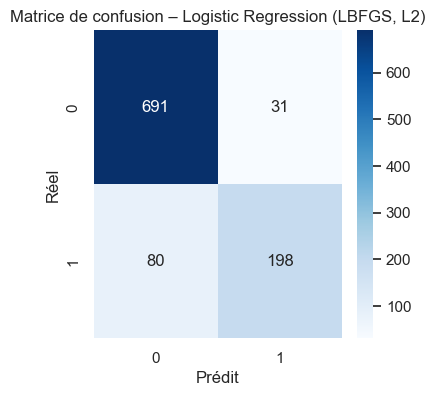

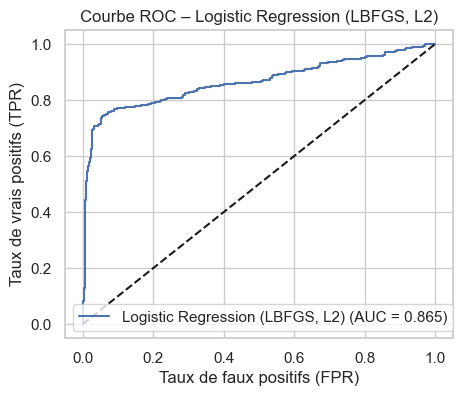


🚀 Modèle : Random Forest (CART + bagging)

📏 Métriques sur le jeu de test :
 - Accuracy   : 0.907
 - Precision  : 0.919
 - Recall     : 0.730
 - F1-score   : 0.814
 - ROC-AUC    : 0.861


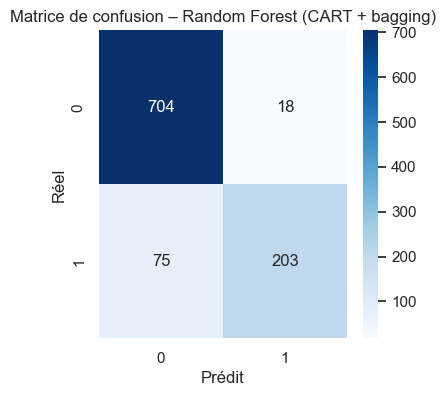

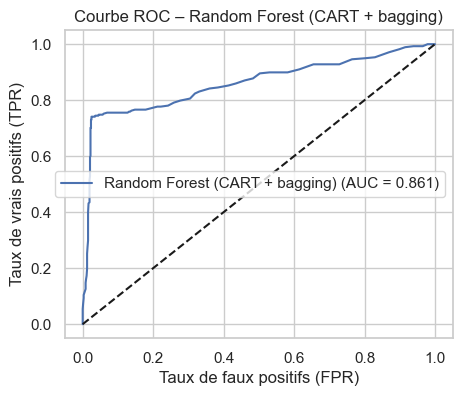


🚀 Modèle : XGBoost (gradient boosting)

📏 Métriques sur le jeu de test :
 - Accuracy   : 0.908
 - Precision  : 0.915
 - Recall     : 0.737
 - F1-score   : 0.817
 - ROC-AUC    : 0.862


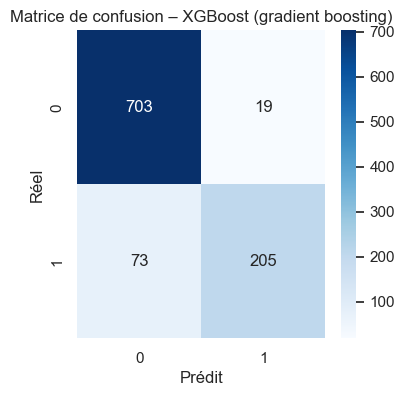

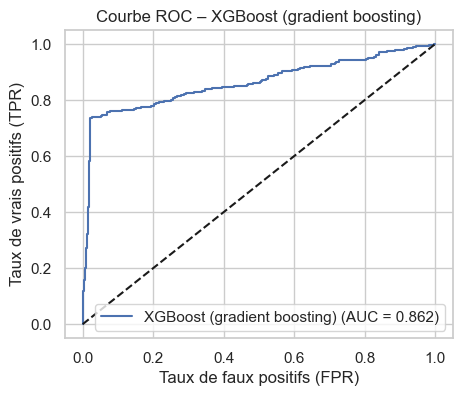


📊 Récapitulatif des modèles de base :


,accuracy,precision,recall,f1,roc_auc
model,,,,,
"Logistic Regression (LBFGS, L2)",0.889,0.864629,0.712230,0.781065,0.864948
XGBoost (gradient boosting),0.908,0.915179,0.737410,0.816733,0.861705
Random Forest (CART + bagging),0.907,0.918552,0.730216,0.813627,0.860664


In [68]:
# Modèles de base (LogReg, RandomForest, XGBoost) + évaluation

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)

results = []  # pour stocker les métriques


def evaluate_model(model, model_name):
    """
    Entraîne un modèle, affiche les métriques et les visualisations,
    et retourne un dictionnaire de résultats.
    """
    print(f"\n{'='*70}")
    print(f"🚀 Modèle : {model_name}")
    print(f"{'='*70}\n")

    # Entraînement
    model.fit(X_train, y_train)

    # Prédictions
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # fallback pour modèles sans predict_proba
        y_proba = None

    # Calcul des métriques
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    print("📏 Métriques sur le jeu de test :")
    print(f" - Accuracy   : {acc:.3f}")
    print(f" - Precision  : {prec:.3f}")
    print(f" - Recall     : {rec:.3f}")
    print(f" - F1-score   : {f1:.3f}")
    if roc_auc is not None:
        print(f" - ROC-AUC    : {roc_auc:.3f}")

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Prédit")
    plt.ylabel("Réel")
    plt.title(f"Matrice de confusion – {model_name}")
    plt.show()

    # Courbe ROC
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure(figsize=(5, 4))
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.3f})")
        plt.plot([0, 1], [0, 1], "k--")
        plt.xlabel("Taux de faux positifs (FPR)")
        plt.ylabel("Taux de vrais positifs (TPR)")
        plt.title(f"Courbe ROC – {model_name}")
        plt.legend()
        plt.show()

    # Sauvegarde des métriques
    res = {
        "model": model_name,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc_auc
    }
    results.append(res)


# 1️⃣ Régression Logistique (optimisation LBFGS + L2)
log_reg = LogisticRegression(
    max_iter=1000,
    solver="lbfgs",      # optimisation LBFGS
    penalty="l2"
)
evaluate_model(log_reg, "Logistic Regression (LBFGS, L2)")


# 2️⃣ Random Forest (CART + bagging)
rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
evaluate_model(rf_clf, "Random Forest (CART + bagging)")


# 3️⃣ XGBoost (gradient boosting) – si disponible
if xgb_available:
    xgb_clf = XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric="logloss",
        n_jobs=-1
    )
    evaluate_model(xgb_clf, "XGBoost (gradient boosting)")


# Tableau récapitulatif des performances
results_df = pd.DataFrame(results).set_index("model")
print("\n📊 Récapitulatif des modèles de base :")
display(results_df.sort_values(by="roc_auc", ascending=False))

## 8 - Optimisation des modèles

### Imports et Setup

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

### 8.1 Optimisation de la Régression Logistique (GridSearchCV, LBFGS)

Objectif :
Optimiser la Régression Logistique en testant différentes valeurs du paramètre de régularisation C via GridSearchCV, sélectionner la configuration la plus performante, puis évaluer le modèle optimisé sur les données de test

🔧 Optimisation Logistic Regression (LBFGS + L2)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
🏆 Meilleur score AUC (CV) : 0.8384
🏆 Meilleurs hyperparamètres : {'C': 5}

🚀 Modèle : Logistic Regression Optimisée

📏 Métriques sur le jeu de test :
 - Accuracy   : 0.888
 - Precision  : 0.861
 - Recall     : 0.712
 - F1-score   : 0.780
 - ROC-AUC    : 0.865


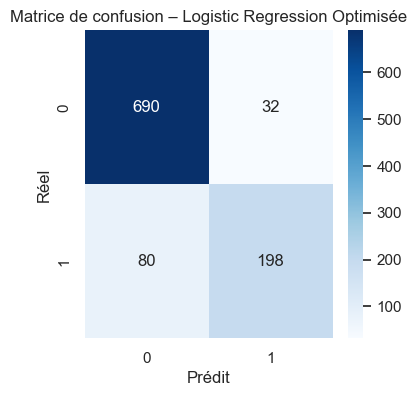

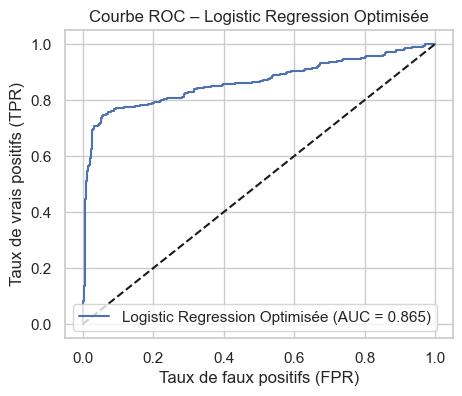

In [70]:
# Optimisation de la Régression Logistique (LBFGS + L2) avec GridSearchCV

print("🔧 Optimisation Logistic Regression (LBFGS + L2)\n")

log_reg = LogisticRegression(max_iter=1000, solver="lbfgs")

param_grid_lr = {
    "C": [0.001, 0.01, 0.1, 1, 5, 10, 20]
}

grid_lr = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid_lr,
    scoring="roc_auc",
    cv=5,
    n_jobs=1,
    verbose=1
)

grid_lr.fit(X_train, y_train)

print(f"🏆 Meilleur score AUC (CV) : {grid_lr.best_score_:.4f}")
print(f"🏆 Meilleurs hyperparamètres : {grid_lr.best_params_}")

best_lr = grid_lr.best_estimator_

evaluate_model(best_lr, "Logistic Regression Optimisée")

### 8.2 Optimisation Random Forest (RandomizedSearchCV)

Objectif :
Explorer efficacement un large espace d’hyperparamètres du Random Forest à l’aide de RandomizedSearchCV, identifier la combinaison offrant le meilleur compromis biais/variance, puis évaluer le modèle final obtenu

🔧 Optimisation Random Forest (RandomizedSearchCV)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
🏆 Meilleur score AUC (CV) : 0.8403
🏆 Meilleurs hyperparamètres : {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5}

🚀 Modèle : Random Forest Optimisé

📏 Métriques sur le jeu de test :
 - Accuracy   : 0.909
 - Precision  : 0.923
 - Recall     : 0.734
 - F1-score   : 0.818
 - ROC-AUC    : 0.870


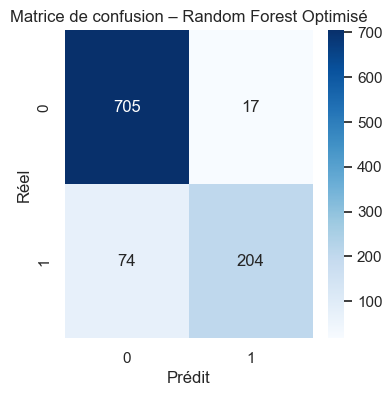

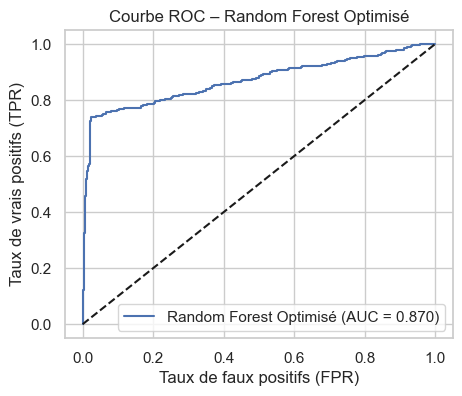

In [71]:
# Optimisation du Random Forest avec RandomizedSearchCV

print("🔧 Optimisation Random Forest (RandomizedSearchCV)\n")

rf = RandomForestClassifier(random_state=42)

param_dist_rf = {
    "n_estimators": [200, 300, 500],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

rand_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=20,
    scoring="roc_auc",
    cv=5,
    random_state=42,
    n_jobs=1,
    verbose=1
)

rand_rf.fit(X_train, y_train)

print(f"🏆 Meilleur score AUC (CV) : {rand_rf.best_score_:.4f}")
print(f"🏆 Meilleurs hyperparamètres : {rand_rf.best_params_}")

best_rf = rand_rf.best_estimator_

evaluate_model(best_rf, "Random Forest Optimisé")

### 8.3 Optimisation XGBoost (RandomizedSearchCV)

Objectif :
Ajuster les hyperparamètres clés du modèle XGBoost (nombre d’arbres, profondeur, learning rate…) grâce à RandomizedSearchCV, sélectionner le modèle optimal et mesurer ses performances sur le jeu de test.

🔧 Optimisation XGBoost (RandomizedSearchCV)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
🏆 Meilleur score AUC (CV) : 0.8405
🏆 Meilleurs hyperparamètres : {'subsample': 0.7, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.7}

🚀 Modèle : XGBoost Optimisé

📏 Métriques sur le jeu de test :
 - Accuracy   : 0.906
 - Precision  : 0.911
 - Recall     : 0.734
 - F1-score   : 0.813
 - ROC-AUC    : 0.863


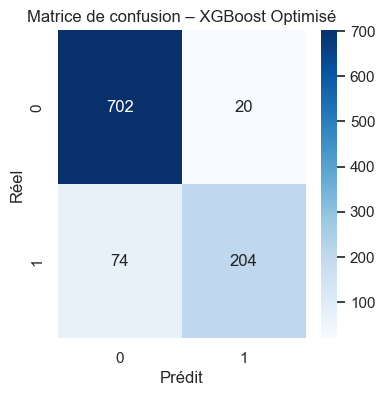

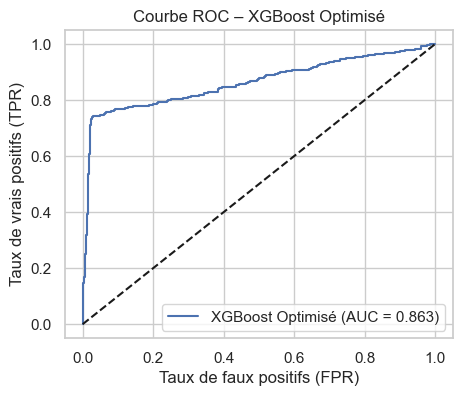

In [72]:
# Optimisation XGBoost (si disponible)

if xgb_available:
    from xgboost import XGBClassifier

    print("🔧 Optimisation XGBoost (RandomizedSearchCV)\n")

    xgb = XGBClassifier(
        eval_metric="logloss",
        n_jobs=1,
        random_state=42
    )

    param_dist_xgb = {
        "n_estimators": [200, 400, 600],
        "learning_rate": [0.01, 0.05, 0.1, 0.2],
        "max_depth": [3, 4, 5, 6],
        "subsample": [0.7, 0.8, 1.0],
        "colsample_bytree": [0.7, 0.8, 1.0]
    }

    rand_xgb = RandomizedSearchCV(
        estimator=xgb,
        param_distributions=param_dist_xgb,
        n_iter=25,
        scoring="roc_auc",
        cv=5,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    rand_xgb.fit(X_train, y_train)

    print(f"🏆 Meilleur score AUC (CV) : {rand_xgb.best_score_:.4f}")
    print(f"🏆 Meilleurs hyperparamètres : {rand_xgb.best_params_}")

    best_xgb = rand_xgb.best_estimator_

    evaluate_model(best_xgb, "XGBoost Optimisé")

## 9 - Comparaison finale, importance des variables et sélection du meilleur modèle

**Objectifs de cette section :**
- Comparer les performances des **modèles optimisés** (Logistic Regression, Random Forest, XGBoost) sur le jeu de test
- Visualiser et interpréter l’**importance des variables** pour chaque modèle
- Sélectionner le **meilleur modèle final** pour la prédiction de la présence d’huile et discuter de son interprétabilité métier

Les modèles comparés sont **ceux optimisés à l’étape 8** :
- best_lr : Régression Logistique optimisée (GridSearchCV, LBFGS + L2)
- best_rf : Random Forest optimisé (RandomizedSearchCV)
- best_xgb : XGBoost optimisé (RandomizedSearchCV, si disponible)

📊 Comparaison finale des modèles optimisés

📌 Tableau comparatif (jeux de test) :


,accuracy,precision,recall,f1,roc_auc
model,,,,,
Random Forest (opt),0.909,0.923,0.734,0.818,0.870
Logistic Regression (opt),0.888,0.861,0.712,0.780,0.865
XGBoost (opt),0.906,0.911,0.734,0.813,0.863


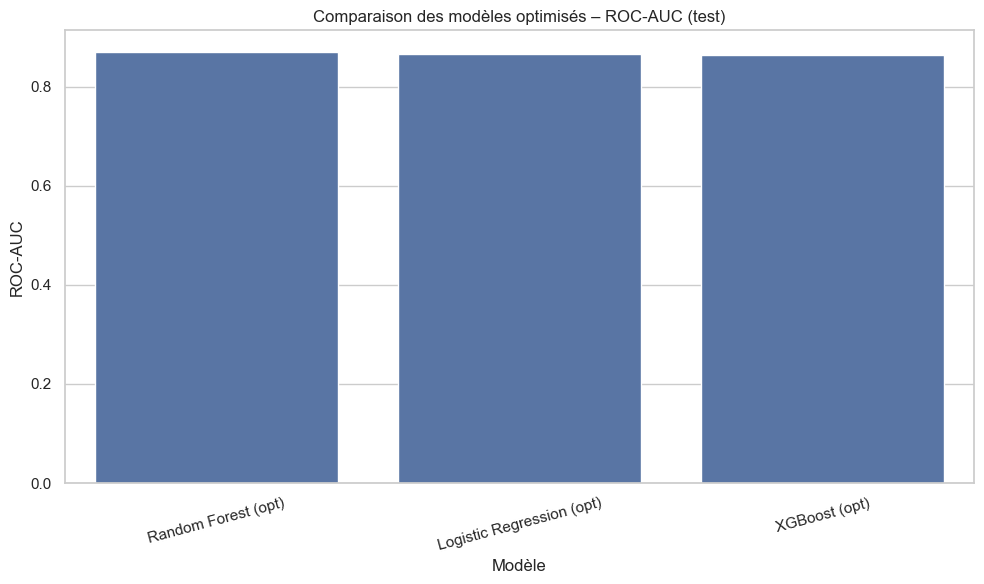

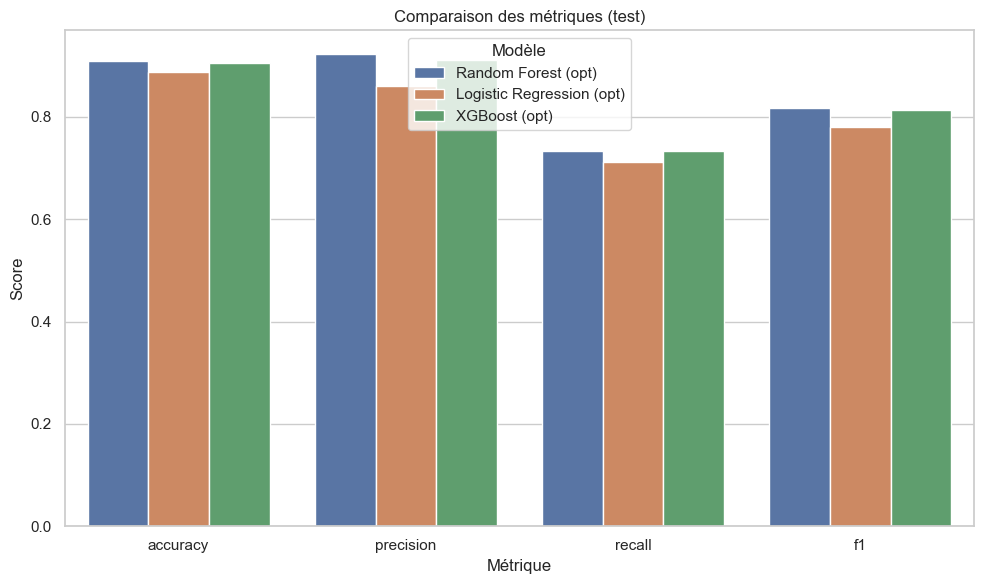


🔍 Importance des variables – Logistic Regression (coefficients absolus)



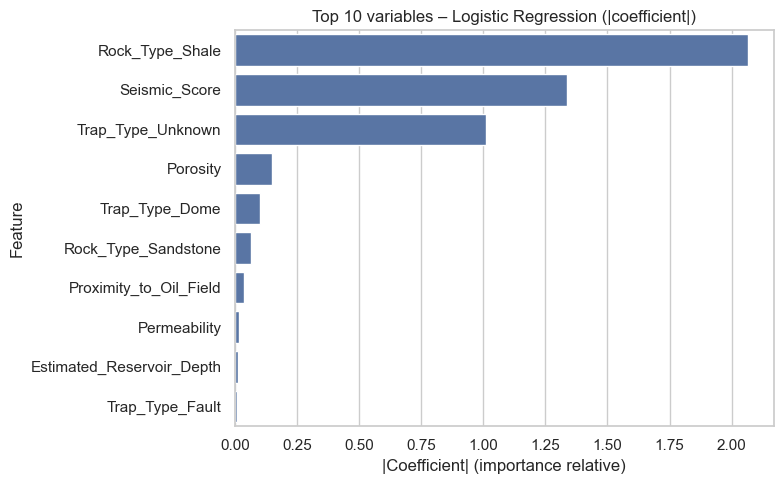


🌲 Importance des variables – Random Forest



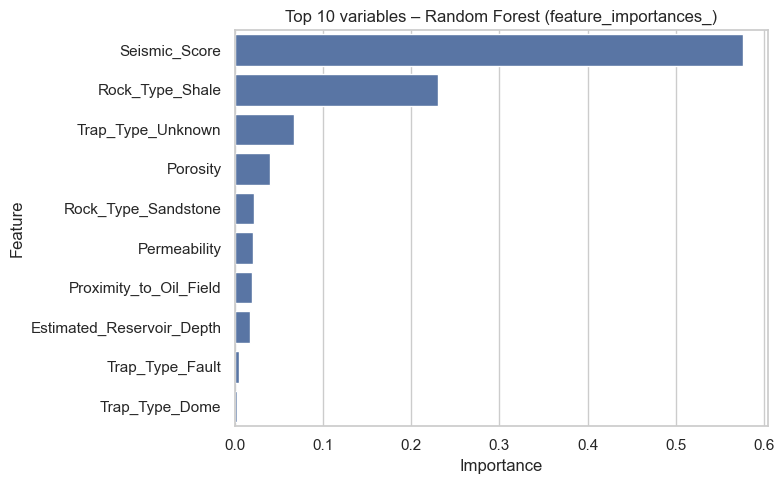


⚡ Importance des variables – XGBoost



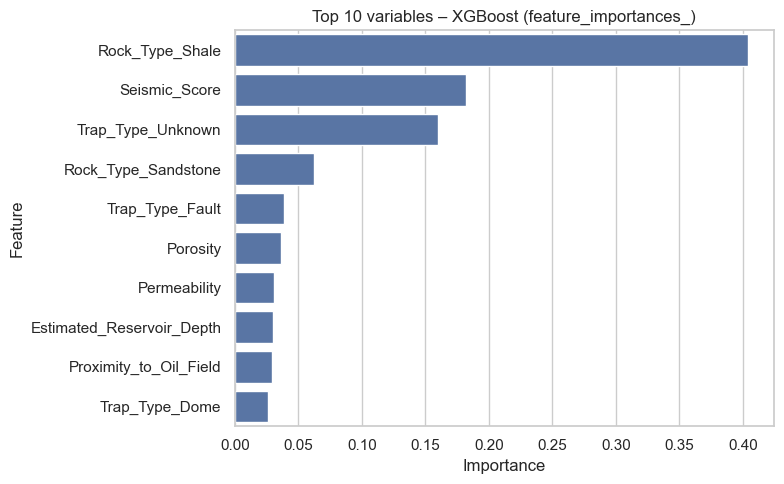

In [73]:
# Comparaison finale et importance des variables

print("📊 Comparaison finale des modèles optimisés\n")

# ================================
# 9.1 – Calcul des métriques finales
# ================================

def compute_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    return {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba),
    }

models_dict = {
    "Logistic Regression (opt)": best_lr,
    "Random Forest (opt)": best_rf,
}

if 'best_xgb' in globals():
    models_dict["XGBoost (opt)"] = best_xgb

rows = []
for name, mdl in models_dict.items():
    m = compute_metrics(mdl, X_test, y_test)
    m["model"] = name
    rows.append(m)

results_final = pd.DataFrame(rows).set_index("model")
results_final = results_final.sort_values(by="roc_auc", ascending=False)

print("📌 Tableau comparatif (jeux de test) :")
display(results_final.style.format("{:.3f}"))

# ================================
# 9.2 – Visualisation des métriques (barplots)
# ================================

plt.figure(figsize=(10, 6))
sns.barplot(
    data=results_final.reset_index(),
    x="model",
    y="roc_auc"
)
plt.title("Comparaison des modèles optimisés – ROC-AUC (test)")
plt.ylabel("ROC-AUC")
plt.xlabel("Modèle")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
metrics_melted = results_final.reset_index().melt(
    id_vars="model",
    value_vars=["accuracy", "precision", "recall", "f1"],
    var_name="metric",
    value_name="value"
)
sns.barplot(
    data=metrics_melted,
    x="metric",
    y="value",
    hue="model"
)
plt.title("Comparaison des métriques (test)")
plt.ylabel("Score")
plt.xlabel("Métrique")
plt.legend(title="Modèle")
plt.tight_layout()
plt.show()

# ================================
# 9.3 – Importance des variables
# ================================
feature_names = X_train.columns

# ---- 9.3.1 – Régression Logistique : coefficients absolus ----
print("\n🔍 Importance des variables – Logistic Regression (coefficients absolus)\n")

lr_coefs = pd.Series(
    np.abs(best_lr.coef_[0]),
    index=feature_names
).sort_values(ascending=False)

top_n = 10
top_lr = lr_coefs.head(top_n)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_lr.values, y=top_lr.index)
plt.title(f"Top {top_n} variables – Logistic Regression (|coefficient|)")
plt.xlabel("|Coefficient| (importance relative)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# ---- 9.3.2 – Random Forest : feature_importances_ ----
print("\n🌲 Importance des variables – Random Forest\n")

rf_importances = pd.Series(
    best_rf.feature_importances_,
    index=feature_names
).sort_values(ascending=False)

top_rf = rf_importances.head(top_n)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_rf.values, y=top_rf.index)
plt.title(f"Top {top_n} variables – Random Forest (feature_importances_)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# ---- 9.3.3 – XGBoost : feature_importances_ (si disponible) ----
if 'best_xgb' in globals():
    print("\n⚡ Importance des variables – XGBoost\n")

    xgb_importances = pd.Series(
        best_xgb.feature_importances_,
        index=feature_names
    ).sort_values(ascending=False)

    top_xgb = xgb_importances.head(top_n)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=top_xgb.values, y=top_xgb.index)
    plt.title(f"Top {top_n} variables – XGBoost (feature_importances_)")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

## 10 - Analyse d’erreurs du meilleur modèle

Objectif :
- Analyser finement les erreurs du meilleur modèle (Random Forest optimisé)
- Identifier les faux positifs / faux négatifs et leurs profils géologiques
- Mieux comprendre les limites du modèle sur le jeu de test

🔍 Analyse d’erreurs pour le meilleur modèle : Random Forest optimisé



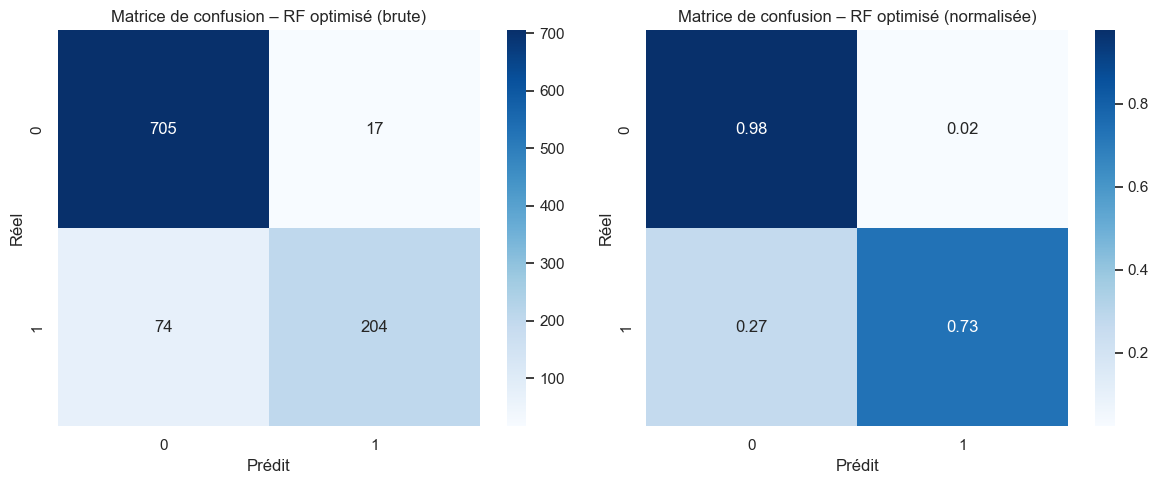


📄 Rapport de classification (Random Forest optimisé) :

              precision    recall  f1-score   support

           0      0.905     0.976     0.939       722
           1      0.923     0.734     0.818       278

    accuracy                          0.909      1000
   macro avg      0.914     0.855     0.879      1000
weighted avg      0.910     0.909     0.906      1000


📊 Répartition des types de prédictions :



error_type
Vrai négatif    705
Vrai positif    204
Faux négatif     74
Faux positif     17
Name: count, dtype: int64


🔎 Exemples de faux négatifs (huile présente mais prédite absente) :


,Rock_Type,Trap_Type,Porosity,Permeability,Seismic_Score,Proximity_to_Oil_Field,Estimated_Reservoir_Depth,y_true,y_pred,proba_1
1072,Shale,Unknown,22.702743,181.175612,0.367294,2.530526,3911,1,0,0.087439
1985,Shale,Fault,27.929959,389.978642,0.408252,3.053413,2390,1,0,0.089870
3161,Shale,Unknown,8.308639,723.192138,0.480207,0.950246,1439,1,0,0.089973
617,Shale,Fault,1.571739,215.905476,0.068446,1.156508,4830,1,0,0.090673
4351,Shale,Fault,27.885171,223.562179,0.544514,3.984195,891,1,0,0.091465
586,Shale,Fault,9.730374,830.858916,0.505783,3.633746,1327,1,0,0.091532
2246,Shale,Anticline,15.426810,272.273224,0.128762,4.353598,1826,1,0,0.093063
816,Shale,Dome,14.969134,633.300947,0.596193,1.596862,3431,1,0,0.095645
1697,Shale,Fault,2.781444,702.636096,0.190221,0.772302,2031,1,0,0.095908
1887,Shale,Anticline,4.000334,700.514444,0.294962,0.321621,2065,1,0,0.096764



🔎 Exemples de faux positifs (huile absente mais prédite présente) :


,Rock_Type,Trap_Type,Porosity,Permeability,Seismic_Score,Proximity_to_Oil_Field,Estimated_Reservoir_Depth,y_true,y_pred,proba_1
3053,Sandstone,Fault,20.705132,381.206608,0.905406,1.375201,1038,0,1,0.821086
3170,Sandstone,Dome,15.729448,459.146275,0.847342,0.594306,2843,0,1,0.791905
1868,Sandstone,Fault,9.309213,985.821014,0.953052,0.223315,2040,0,1,0.777237
2844,Sandstone,Anticline,11.081735,339.402522,0.660735,3.748571,4180,0,1,0.753886
2520,Limestone,Fault,18.659424,979.124291,0.672982,2.258369,3171,0,1,0.749932
2262,Limestone,Dome,11.938810,563.531184,0.981002,3.206594,4309,0,1,0.737243
1121,Limestone,Fault,8.179519,792.884810,0.626932,1.895151,2766,0,1,0.736441
1595,Limestone,Fault,1.635358,637.305069,0.730735,2.870610,1213,0,1,0.729909
3077,Limestone,Dome,15.681284,629.880812,0.948583,4.894078,3522,0,1,0.724837
1844,Limestone,Dome,9.537140,476.144994,0.648276,2.484080,2642,0,1,0.724813


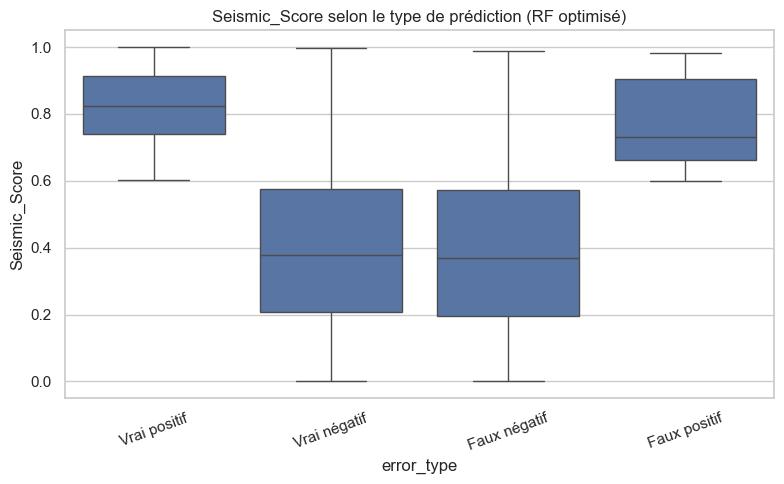

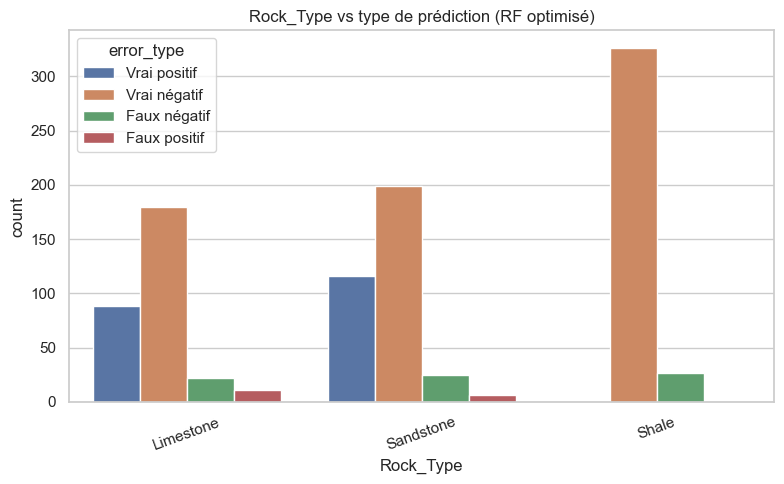

In [74]:
# Analyse d’erreurs du meilleur modèle (Random Forest optimisé)

from sklearn.metrics import confusion_matrix, classification_report

sns.set(style="whitegrid")

print("🔍 Analyse d’erreurs pour le meilleur modèle : Random Forest optimisé\n")

# 1) Prédictions sur le jeu de test
best_model = best_rf  # on fixe explicitement le modèle choisi
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

# 2) Matrices de confusion brute et normalisée
cm = confusion_matrix(y_test, y_pred_best)
cm_norm = confusion_matrix(y_test, y_pred_best, normalize="true")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Matrice de confusion – RF optimisé (brute)")
axes[0].set_xlabel("Prédit")
axes[0].set_ylabel("Réel")

sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues", ax=axes[1])
axes[1].set_title("Matrice de confusion – RF optimisé (normalisée)")
axes[1].set_xlabel("Prédit")
axes[1].set_ylabel("Réel")

plt.tight_layout()
plt.show()

# 3) Rapport de classification détaillé
print("\n📄 Rapport de classification (Random Forest optimisé) :\n")
print(classification_report(y_test, y_pred_best, digits=3))

# 4) Construction d’un DataFrame d’analyse sur le jeu de test
#    On récupère les features d’origine correspondant aux index de y_test
test_geo = df.loc[y_test.index].copy()
test_geo["y_true"] = y_test
test_geo["y_pred"] = y_pred_best
test_geo["proba_1"] = y_proba_best

# Définition du type d’erreur
def label_error(row):
    if row["y_true"] == 1 and row["y_pred"] == 0:
        return "Faux négatif"
    elif row["y_true"] == 0 and row["y_pred"] == 1:
        return "Faux positif"
    elif row["y_true"] == 1 and row["y_pred"] == 1:
        return "Vrai positif"
    else:
        return "Vrai négatif"

test_geo["error_type"] = test_geo.apply(label_error, axis=1)

print("\n📊 Répartition des types de prédictions :\n")
display(test_geo["error_type"].value_counts())

# 5) Focus sur les faux négatifs / faux positifs
fn = test_geo[test_geo["error_type"] == "Faux négatif"].sort_values("proba_1")
fp = test_geo[test_geo["error_type"] == "Faux positif"].sort_values("proba_1", ascending=False)

print("\n🔎 Exemples de faux négatifs (huile présente mais prédite absente) :")
display(fn.head(10)[["Rock_Type", "Trap_Type", "Porosity", "Permeability",
                     "Seismic_Score", "Proximity_to_Oil_Field",
                     "Estimated_Reservoir_Depth", "y_true", "y_pred", "proba_1"]])

print("\n🔎 Exemples de faux positifs (huile absente mais prédite présente) :")
display(fp.head(10)[["Rock_Type", "Trap_Type", "Porosity", "Permeability",
                     "Seismic_Score", "Proximity_to_Oil_Field",
                     "Estimated_Reservoir_Depth", "y_true", "y_pred", "proba_1"]])

# 6) Visualisation des erreurs vs Seismic_Score et Rock_Type
plt.figure(figsize=(8, 5))
sns.boxplot(data=test_geo, x="error_type", y="Seismic_Score")
plt.title("Seismic_Score selon le type de prédiction (RF optimisé)")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=test_geo, x="Rock_Type", hue="error_type")
plt.title("Rock_Type vs type de prédiction (RF optimisé)")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

## 11 - Interprétabilité du meilleur modèle avec SHAP

Objectif
- Utiliser SHAP pour expliquer les prédictions du meilleur modèle (Random Forest optimisé)
- Visualiser l’impact des variables sur la probabilité de présence d’huile
- Interpréter les résultats d’un point de vue géologique

### 11.1 Installation et import de SHAP

In [75]:
# Interprétabilité du meilleur modèle avec SHAP

sns.set(style="whitegrid")

# Installation de SHAP si nécessaire
try:
    import shap
except ImportError:
    %pip install shap
    import shap

print("✅ SHAP chargé.")

✅ SHAP chargé.


### 11.2 Préparation de l’explainer, calcul des valeurs SHAP et visualisation

🔎 Interprétabilité du meilleur modèle avec SHAP

📉 Échantillon SHAP : 300 lignes


ExactExplainer explainer: 301it [01:33,  2.86it/s]                         


✅ Valeurs SHAP calculées.
shape shap_values : (300, 10, 2)
shape shap_class1 : (300, 10)
shape X_shap      : (300, 10)


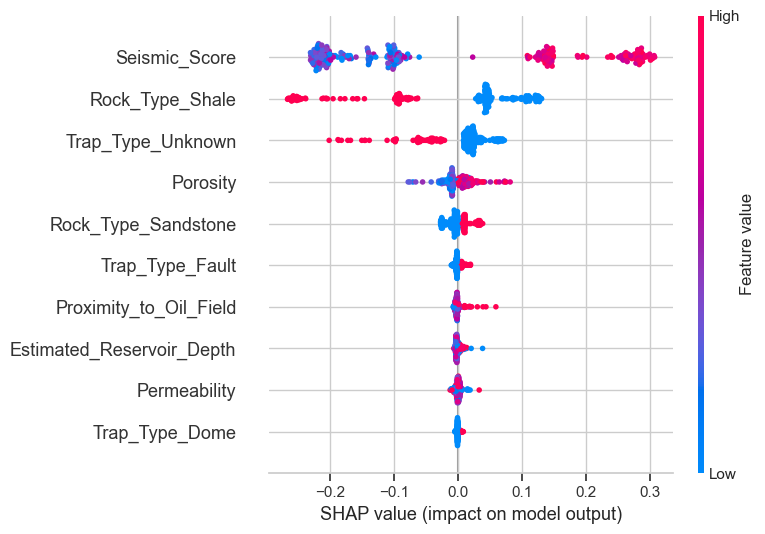

c:\Users\ouldb\anaconda3\envs\oil-ml\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



📍 Index observé                 : 3457
   Valeur réelle (Oil_Presence) : 0
   Proba prédite (classe 1)     : 0.141


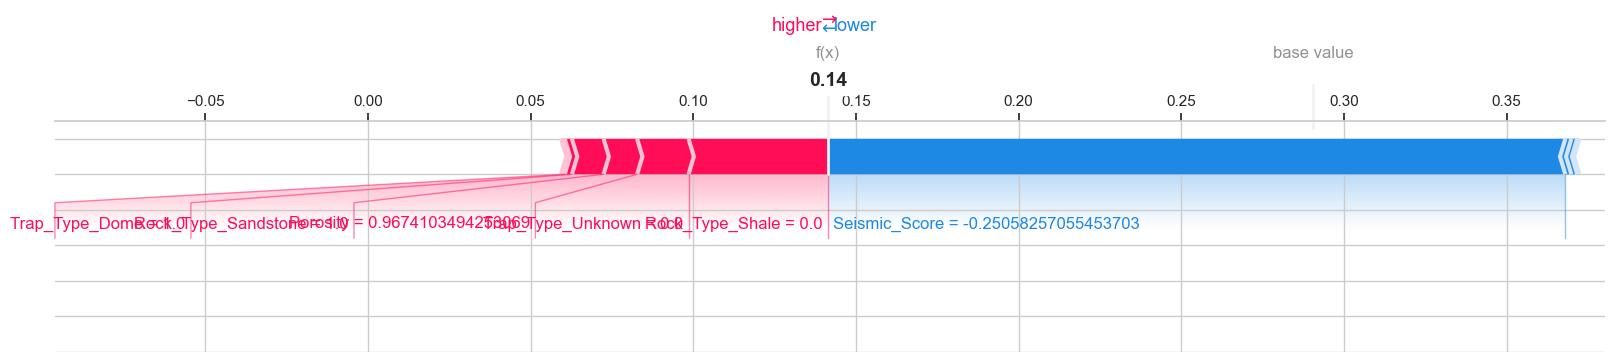

In [76]:
# Calcul et visualisation SHAP (global et locale)

sns.set(style="whitegrid")

print("🔎 Interprétabilité du meilleur modèle avec SHAP\n")

# 1) On fixe le meilleur modèle (pipeline complet Random Forest optimisé)
best_model = best_rf

# 2) Sous-échantillonnage du jeu de test pour SHAP (pour aller plus vite)
X_shap = X_test.copy()
y_shap = y_test.copy()

if X_shap.shape[0] > 300:
    X_shap, _, y_shap, _ = train_test_split(
        X_shap,
        y_shap,
        test_size=0.7,
        random_state=42,
        stratify=y_shap
    )
    print(f"📉 Échantillon SHAP : {X_shap.shape[0]} lignes")
else:
    print(f"📊 Jeu de test complet utilisé pour SHAP : {X_shap.shape[0]} lignes")

# 3) Explainer "générique" sur la probabilité (pipeline inclus)
#    -> SHAP gère lui-même le preprocessing interne du modèle
explainer = shap.Explainer(
    lambda X: best_model.predict_proba(X),
    X_shap
)

# 4) Calcul des valeurs SHAP
shap_values = explainer(X_shap)  # objet shap.Explanation
print("✅ Valeurs SHAP calculées.")
print("shape shap_values :", shap_values.values.shape)

# 5) Summary plot global pour la classe 1 (présence d’huile)
#    shap_values.values : (n_samples, n_features, n_classes)
shap_class1 = shap_values.values[..., 1]

print("shape shap_class1 :", shap_class1.shape)
print("shape X_shap      :", X_shap.shape)

plt.title("Summary plot SHAP – Random Forest optimisé (classe 1)")
shap.summary_plot(
    shap_class1,
    X_shap,
    feature_names=X_shap.columns
)

# 6) Force plot pour un exemple individuel (explication locale)
idx = 0

x_instance = X_shap.iloc[idx, :]
y_true = y_shap.iloc[idx]
y_pred_proba = best_model.predict_proba([x_instance])[0, 1]

print(f"\n📍 Index observé                 : {X_shap.index[idx]}")
print(f"   Valeur réelle (Oil_Presence) : {y_true}")
print(f"   Proba prédite (classe 1)     : {y_pred_proba:.3f}")

# Base value adaptée à la nouvelle API SHAP
base_value_class1 = shap_values.base_values[idx, 1]

shap.force_plot(
    base_value_class1,     # valeur de base pour la classe 1
    shap_class1[idx, :],   # contributions des features
    x_instance,            # valeurs réelles des features
    matplotlib=True
)
plt.show()

### 11.3 Analyse géologique des résultats SHAP

Les résultats SHAP obtenus sur le Random Forest optimisé permettent d’évaluer non seulement l’importance des variables, mais aussi le sens de leur influence sur la probabilité de présence d’huile.
Les visualisations (summary plot + force plot) confirment plusieurs tendances géologiquement cohérentes.

1. **Seismic_Score** : le facteur dominant
Le Seismic_Score est clairement la variable la plus influente.
- Valeurs élevées → contribuent fortement à augmenter la probabilité d’huile
- Valeurs faibles → tirent la prédiction vers l'absence d’huile

-> Cela s’aligne directement avec la géophysique :
un signal sismique marqué indique souvent la présence de réflecteurs nets, de contrastes lithologiques et de pièges favorables

2. **Types de roche** : signature des roches réservoirs
Les variables Rock_Type_ montrent une influence marquée :
- Les roches réservoirs (ex. Sandstone) ont un impact positif clair
- Les roches non-réservoirs (ex. Shale) tirent le score SHAP vers le bas

**Interprétation** :
Les grès ou calcaires sont de bons réservoirs ; les schistes stockent peu d’hydrocarbures.

3. **Types de pièges (Trap_Type_)** : rôle structural confirmé
Les trap types apparaissent comme des modulateurs importants :
- Les pièges structuraux (Dôme, Failles, Anticline — selon les modalités présentes)
-> favorisent la classe 1
- Trap_Type_Unknown -> effet négatif constant

-> Ce résultat est conforme à la géologie structurale :
un piège identifié augmente les chances d’accumulation d’hydrocarbures, un piège « inconnu » reflète un contexte défavorable ou incertain

4. **Porosity, Permeability, Proximity_to_Oil_Field, Estimated_Reservoir_Depth**
Ces variables présentent une influence plus douce mais cohérente :
- Porosité & perméabilité élevées -> augmente la probabilité
- Proximity_to_Oil_Field (distance faible -> bleu / distance élevée -> rouge)
--> forte proximité = contexte géologique favorable
- Estimated_Reservoir_Depth
--> valeurs extrêmes (trop faible ou trop grande) tirent la prédiction vers la classe 0

-> Ce comportement correspond aux lois de la pétrophysique :
meilleure porosité/permeabilité = capacité accrue de stockage et de circulation des hydrocarbures

5. **Analyse locale** (force plot)
Sur ton force plot :
- les facteurs positifs (ex. Trap_Type_Dome, Rock_Type_Sandstone, Porosity) poussent la prédiction vers la présence d’huile
- les facteurs négatifs (ex. Seismic_Score faible dans le cas illustré) tirent la prédiction vers l’absence d’huile.

-> Ce type de visualisation montre précisément comment les contributions individuelles se combinent pour une observation donnée

✅ **Conclusion**
Les analyses SHAP confirment que :
- le modèle n’utilise pas du bruit aléatoire
- les décisions reposent sur des relations géologiques réelles :
sismique -> pièges -> lithologie -> pétrophysique -> contexte géologique régional.

### 11.4 Importance moyenne des features (bar plot SHAP)

Ce graphique montre l’importance moyenne absolue des contributions SHAP pour la classe 1 (huile présente). C’est la version “réduite” du summary plot, utile pour la communication métier.

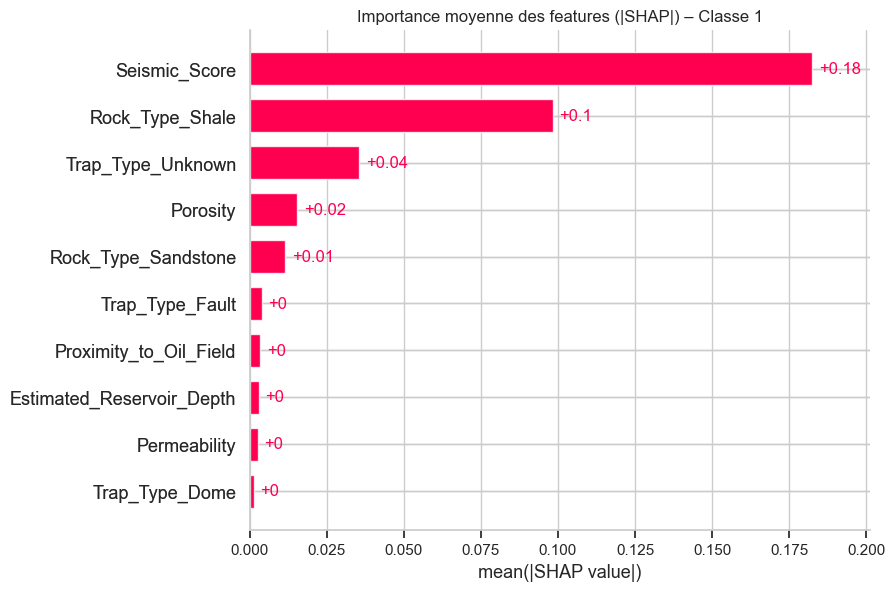

In [77]:
# Importance moyenne des features (bar plot)

# SHAP values pour la classe 1
shap_class1 = shap_values.values[..., 1]

plt.title("Importance moyenne des features (|SHAP|) – Classe 1")
shap.plots.bar(
    shap_values[:, :, 1],       # valeurs SHAP pour la classe 1
    max_display=15
)
plt.show()

## 12 - Pipeline de prédiction et sauvegarde du modèle

Objectif :
- Construire une fonction de prédiction simple et robuste (probabilité et classe)
- Sauvegarder le modèle optimisé sous forme de pipeline complet (préprocessing et modèle)
- Sauvegarder également les SHAP explainer si besoin

### 12.1 Pipeline de prédiction

In [78]:
# Pipeline de prédiction

def predict_oil_presence(sample_df):
    """
    Prend un DataFrame (1 ou plusieurs lignes) avec les features brutes
    et retourne la probabilité prédite et la classe.
    """
    proba = best_model.predict_proba(sample_df)[:, 1]
    pred = (proba >= 0.5).astype(int)

    return proba, pred


# Exemple d'utilisation
sample_test = X_test.iloc[:5, :]
proba, pred = predict_oil_presence(sample_test)

print("Probabilités :", proba)
print("Prédictions  :", pred)

Probabilités : [0.75092793 0.22965321 0.13214247 0.088666   0.11192705]
Prédictions  : [1 0 0 0 0]


### 12.2 Sauvegarde et rechargement du modèle

In [79]:
# Sauvegarde du modèle

import joblib

joblib.dump(best_model, "best_rf_model.joblib")
print("📁 Modèle sauvegardé : best_rf_model.joblib")

📁 Modèle sauvegardé : best_rf_model.joblib


## 13. Conclusion et perspectives

Ce projet de prédiction de la présence d’huile à partir de données géologiques synthétiques a permis de :

### Construire un pipeline ML complet
- vérification du dataset
- preprocessing robuste
- optimisation d’hyperparamètres (GridSearch / RandomizedSearch)
- comparaison finale des modèles
- sélection du meilleur modèle : **Random Forest optimisé**.

### Atteindre de bonnes performances sur données de test
Le Random Forest se montre performant et stable, avec :
- une bonne capacité à capturer les interactions non linéaires
- une gestion fiable des différents types de features (catégorielles, sismiques, pétrophysiques).

### Interpréter finement les décisions du modèle grâce à SHAP
Les visualisations SHAP montrent que :
- **Seismic_Score** est le facteur le plus déterminant
- les **types de roche** et **types de pièges** jouent un rôle majeur
- les paramètres pétrophysiques (porosité, perméabilité) influencent de manière progressive
- le modèle exploite des relations **géologiquement cohérentes**, ce qui renforce sa crédibilité opérationnelle.

### Perspectives d’amélioration

1. **Intégration d’un modèle gradient boosting (XGBoost / LightGBM)**
   Pour comparer avec un modèle plus performant sur grands volumes

2. **Ajout de nouvelles features géologiques**
   - épaisseur de réservoir
   - gradients thermiques
   - anisotropies sismiques
   - propriétés sédimentaires détaillées.

3. **Analyse d’incertitude**
   Utilisation de méthodes comme le Monte-Carlo Dropout ou les quantile forests

4. **Déploiement réel**
   - encapsulation dans une API FastAPI
   - CI/CD
   - monitoring du drift (data et concept drift)
   - mise en production via Docker.

5. **Visualisations interactives SHAP**
   Pour usage métier (géologues, ingénieurs réservoir)


En résumé :
- Le modèle est performant, explicable et géologiquement cohérent
- Le pipeline est prêt pour l’industrialisation et l’extension vers un cas réel